# Bar plot from a dataframe

#### References:

- [seaborn.barplot (documentation)](https://seaborn.pydata.org/generated/seaborn.barplot.html)

In [1]:
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

### create data

In [3]:
df = sns.load_dataset('titanic')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


### bar plot

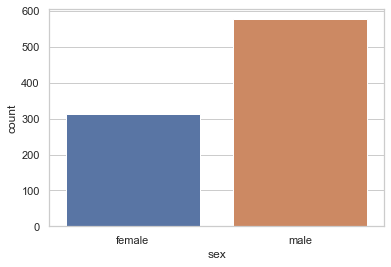

In [62]:
colname_num = 'count'
colname_cat1 = 'sex'
colname_cat2 = ''
colname_cat3 = ''
# counter
fcount = lambda x: len(x)
# aggregator
def fagg(df, columns_cat):
    if not type(columns_cat) == list: columns_cat = [columns_cat]
    aggregations = {'%s'%columns_cat[0]:{'count': fcount}}
    data = df.groupby(columns_cat).agg(aggregations)
    data.columns = ['count']
    return data.reset_index(inplace = False)
# arguments validation
assert colname_num in df.columns.tolist() or colname_num == 'count', 'Numerical column "%s" is not available.'%colname_num
assert colname_cat1 in df.columns.tolist(), 'Categorical column "%s" is not available.'%colname_cat1
assert colname_cat2 in df.columns.tolist() or colname_cat2 == '', 'Categorical column "%s" is not available.'%colname_cat2
assert colname_cat3 in df.columns.tolist() or colname_cat3 == '', 'Categorical column "%s" is not available.'%colname_cat3
# plot
if colname_num == 'count':
    if colname_cat2 =='' and colname_cat3 == '':
        data = fagg(df, colname_cat1)
        ax = sns.barplot(x=colname_cat1, y=colname_num, data=data)
    elif colname_cat2 != '' and colname_cat3 == '': 
        data = fagg(df, [colname_cat1, colname_cat2])
        ax = sns.barplot(x=colname_cat1, y=colname_num, hue = colname_cat2, data=data)
    elif colname_cat2 != '' and colname_cat3 != '': 
        data = fagg(df, [colname_cat1, colname_cat2, colname_cat3])
        ax = sns.catplot(x=colname_cat1, y=colname_num, hue = colname_cat2, col = colname_cat3, data=data, kind = 'bar')
else: 
    if colname_cat2 =='' and colname_cat3 == '':
        ax = sns.barplot(x=colname_cat1, y=colname_num, data=df)
    elif colname_cat2 != '' and colname_cat3 == '': 
        ax = sns.barplot(x=colname_cat1, y=colname_num, hue = colname_cat2, data=df)
    elif colname_cat2 != '' and colname_cat3 != '': 
        ax = sns.catplot(x=colname_cat1, y=colname_num, hue = colname_cat2, col = colname_cat3, data=df, kind = 'bar')
